In [1]:
# 합성곱 신경망 
# 이미지나 영상을 처리하는데 유용하다. 

In [2]:
# 이미지 분석은 3×3 배열을 한 줄로 펼쳐서(flattening) 각 픽셀에 가중치를 곱하여 
# 은닉층으로 전달하게 된다. 하지만 이미지를 펼쳐서 분석하면 데이터의 공간적 구조를 
# 무시하게 되는데, 이것을 방지하려고 도입된 것이 합성곱층이다.

In [3]:
# 합성곱 신경망(Convolutional Neural Network, CNN 또는 ConvNet) 
# 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망이다. 
# 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있으며, 
# 계층 다섯 개로 구성된다. 
# 1. 입력층 2. 합성곱층 3. 풀링층 4. 완전연결층 5. 출력층 

# 합성곱 신경망은 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터(feature vector)를 추출한다. 
# 그 후 추출된 주요 특성 벡터들은 완전연결층을 거치면서 1차원 벡터로 변환되며, 
# 마지막으로 출력층에서 활성화 함수인 소프트맥스(softmax) 함수를 사용하여 최종 결과가 출력된다. 

In [4]:
# 입력층 
# 입력 이미지 데이터가 최초로 거치게 되는 계층. 
# 이미지는 단순 1차원의 데이터가 아닌 높이(height), 너비(width), 채널(channel)의 값을 갖는 3차원 데이터. 
# 이때 채널은 이미지가 그레이스케일(gray scale)이면 1 값을 가지며, 컬러(RGB)면 3 값을 갖는다. 
# 예를 들어 다음 그림과 같은 형태는 높이 4, 너비 4, 채널은 RGB를 갖고 있으므로, 이미지 형태(shape)는 (4, 4, 3)으로 표현할 수 있습니다.

In [5]:
# 합성곱층 (convolutional layer)
# 입력 데이터에서 특성을 추출하는 역할을 수행.
# 입력 이미지가 들어왔을 때 이미지에 대한 특성을 감지하기 위해 커널(kernel)이나 필터를 사용한다. 
# 커널/필터는 이미지의 모든 영역을 훑으면서 특성을 추출하게 되는데, 
# 이렇게 추출된 결과물이 특성 맵(feature map)이다.
# 이때 커널은 3×3, 5×5 크기로 적용되는 것이 일반적이며, 
# 스트라이드(stride)1라는 지정된 간격에 따라 순차적으로 이동한다.

# cf) 스트라이드란 필터를 적용하는 위치의 간격을 의미

In [6]:
# 컬러 이미지의 합성곱
# 그레이스케일 이미지와 구분되는 특징: 
# 첫째, 필터 채널이 3이라는 것 
# 둘째, RGB 각각에 서로 다른 가중치로 합성곱을 적용한 후 결과를 더해 준다는 것. 
# 그 외 스트라이드 및 연산하는 방법은 동일하다. 
# 이때 필터 채널이 3이라고 해서 필터 개수도 세 개라고 오해하기 쉬운데, 
# 실제로는 필터 개수가 한 개라는 점에 주의해야 한다.

In [7]:
# 풀링층 (pooling layer)
# 합성곱층과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 
# 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 한다.

# - 최대 풀링(max pooling): 대상 영역에서 최댓값을 추출
# - 평균 풀링(average pooling): 대상 영역에서 평균을 반환

# 하지만 대부분의 합성곱 신경망에서는 최대 풀링이 사용되는데, 
# 평균 풀링은 각 커널 값을 평균화시켜 중요한 가중치를 갖는 값의 특성이 희미해질 수 있기 때문이다.

In [8]:
# 완전연결층 (fully connected layer)
# 이 과정에서 이미지는 3차원 벡터에서 1차원 벡터로 펼쳐지게(flatten) 된다.

In [9]:
# 출력층 (output layer)
# 소프트맥스 활성화 함수가 사용되는데, 입력받은 값을 0~1 사이의 값으로 출력
# 따라서 마지막 출력층의 소프트맥스 함수를 사용하여 
# 이미지가 각 레이블(label)에 속할 확률 값이 출력되며, 
# 이때 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정된다.

합성곱 신경망 실습 

In [10]:
# 라이브러리 호출 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# fashion_mnist 데이터셋 내려받기 
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


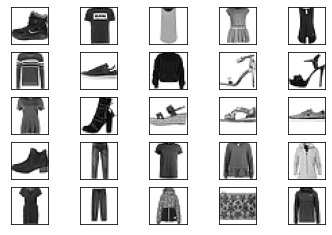

In [12]:
# 분류에 사용될 클래스 정의 
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1) # 5 x 5의 형태, 1칸씩 증가 
    plt.grid(False) # 격자 없음 
    plt.xticks([]) # x축 
    plt.yticks([]) # y축 
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show() # 이미지 데이터 25개를 시각적으로 표현 

In [17]:
# 심층 신경망을 이용한 모델 생성 및 훈련 
x_train, x_test = x_train / 255.0, x_test / 255.0 

model = tf.keras.models.Sequential([ # 모델 생성 
    tf.keras.layers.Flatten(input_shape = (28, 28)), # Flatten: 1차원으로 변형
    tf.keras.layers.Dense(128, activation = 'relu'), # 밀집층 사용으로 입력층과 출력층을 연결 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax') 
    # 밀집층의 사용은 이미지의 공간적 특성들이 무시되는 문제를 막기 위함
    # Dense(a, b)의 인자 구성:  
    # a: 첫 번째 파라미터: 출력 값의 크기로 노드 개수를 의미
    # b: activation: 활성화 함수를 설정
])

In [18]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5) # 훈련 데이터셋을 이용하여 모델 훈련 
model.evaluate(x_test, y_test, verbose = 2) # 검증 데이터셋을 이용하여 모델 평가 

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1029
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3004 - accuracy: 0.1149
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2911 - accuracy: 0.1569
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2682 - accuracy: 0.1981
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2302 - accuracy: 0.2297
313/313 - 0s - loss: 2.2040 - accuracy: 0.2839


[2.2039875984191895, 0.2838999927043915]

이미지 데이터를 255로 나누는 이유

In [20]:
# 라이브러리 호출 
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [27]:
# 이미지 정보를 보여주는 함수 
def print_image_summary(image, labels):
    print('-------------')
    print('Image Details:')
    print('-------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')
    
    if len(labels) == 1:
        image = image[..., np.newaxis]
    
    for i, lab in enumerate(labels):
        min_val = np.min(image[:, :, i])
        max_val = np.max(image[:, :, i])
        print(f'{lab}:min = {min_val:.4f}, max = {max_val:.4f}')

In [23]:
# !pip install scikit_image

-------------
Image Details:
-------------
Image dimensions: (703, 454, 3)
Channels:
G:min = 0.0000, max = 255.0000


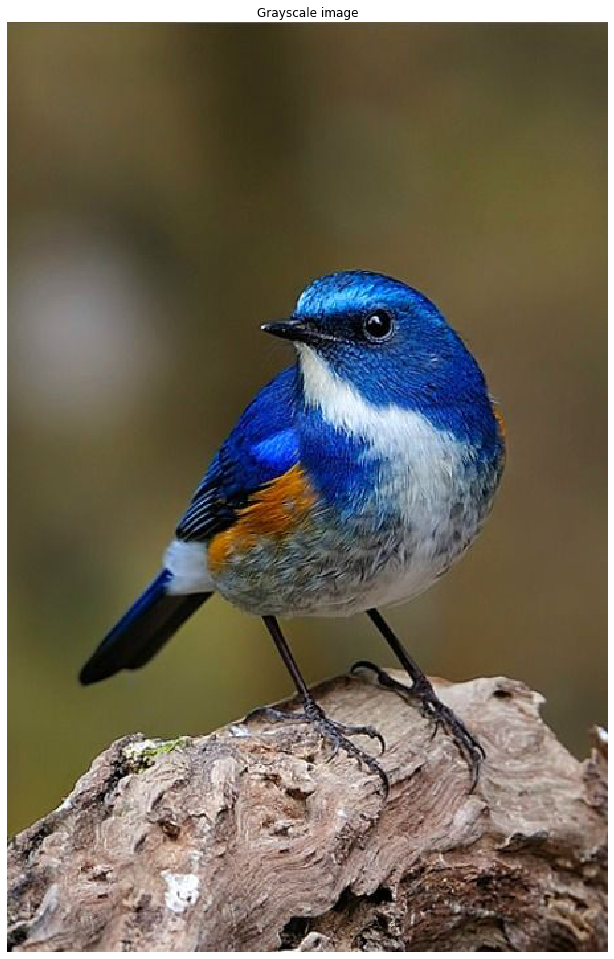

In [31]:
# 이미지 호출 
image_gs = imread('data/bird.jpg', as_gray = True) # 흑백 출력 
fig, ax = plt.subplots(figsize = (9, 16))
imshow(image_gs, ax = ax)
ax.set_title('Grayscale image')
ax.axis('off')

# 이미지 정보 표현 
print_image_summary(image_gs, ['G']) 
# cf) 흑백일 때는 'Image dimensions: (703, 454)'이, 
# 컬러일 때는 'Image dimensions: (703, 454, 3)'이 나온다.

In [32]:
# 결론 
# 255로 나누는 이유는 0~255 픽셀값을 갖는 기본 이미지 데이터를 
# 0~1 픽셀값을 갖도록 데이터에 대한 전처리가 필요하기 때문이다. 

In [33]:
# 합성곱 - 데이터 전처리 
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255

In [35]:
# 합성곱 네트워크를 이용한 모델 생성 
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', 
                           input_shape = (28, 28, 1)),
    # 첫 번째 층은 입력 이미지에 적용되는 합성곱층. 필터는 (3,3), 패딩을 사용해 원래 이미지 크기를 유지
    # 32: 합성곱 필터 개수
    # (3, 3): 커널의 행과 열
    # padding: 경계처리  same - 출력과 입력 이미지가 같게 
    #                    valid - 출력이 입력보다 작게 
    # activation = 'relu': 은닉층에서 사용. 
    #            ='linear'가 디폴트. 입력과 가중치가 계산된 값 출력
    # input_shape: 입력 데이터의 형태를 정의. 첫 계층에서만 정의. 1이 흑백, 3이 컬러 
    
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),
    # 풀링층은 필터 크기가 (2,2), 스트라이드가 2 (건너뛰는 단위)
        
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2), 
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation = 'relu'),
    # 소프트맥스 활성화 함수가 적용된 출력층
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_with_conv.compile(optimizer = 'adam', 
                       loss = 'sparse_categorical_crossentropy', 
                       metrics = ['accuracy'])

In [36]:
# 모델 훈련 및 성능 평가 
model_with_conv.fit(X_train_final, y_train, epochs = 5)
model_with_conv.evaluate(X_test_final, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3028 - accuracy: 0.0986
Epoch 2/5
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3028 - accuracy: 0.0981
313/313 - 2s - loss: 2.3026 - accuracy: 0.1000


[2.302608013153076, 0.10000000149011612]

전이 학습 (transfer learning)

In [37]:
# 아주 큰 데이터셋을 써서 훈련된 모델의 가중치를 가져와 
# 우리가 해결하려는 과제에 맞게 보정해서 사용하는 것
# 사전 훈련된 모델(네트워크): 아주 큰 데이터셋을 사용하여 훈련된 모델
# 전이 학습을 위한 방법으로는 특성 추출과 미세 조정 기법이 있다. 

In [38]:
# 특성 추출 기법 (feature extractor)
# 학습할 때는 마지막 완전연결층(이미지의 카테고리를 결정하는 부분)만 학습하고 나머지 계층들은 학습되지 않도록 한다.
# • 합성곱층: 합성곱층과 풀링층으로 구성
# • 데이터 분류기(완전연결층): 추출된 특성을 입력받아 최종적으로 이미지에 대한 클래스를 분류하는 부분
# 사전 훈련된 네트워크의 합성곱층(가중치 고정)에 새로운 데이터를 통과시키고, 그 출력을 데이터 분류기에서 훈련한다. 

In [40]:
# 라이브러리 호출 
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
# 사전 훈련된 모델(ResNet50) 내려받기 
model = ResNet50(include_top = True, # 네트워크 상단에 완전 연결층을 포함할지 여부. True가 디폴트
                weights = "imagenet", # weight: 가중치. None - 무작위 초기화. 'imagenet' - 사전 훈련된 값
                input_tensor = None, # 입력 데이터의 텐서(layers.Input()의 출력)
                input_shape = None, # 입력 이미지에 대한 텐서 크기 
                pooling = None, # 풀링 값에 들어갈 수 있는 값: None - 마지막 합성곱층 출력 
                                # avg - 마지막 합성곱층에 글로벌 평균 풀링 추가 
                                # max - 마지막 합성곱층에 글로벌 최대 풀링 추가 
                classes = 1000) # weights로 'imagenet'을 사용하려면 classes 값이 1000이어야 한다. 
                                # 다른 값을 사용하고 싶다면 'None'으로 지정한다. 
    
# ResNet50 
# 계층 50개로 구성된 합성곱 신경망
# ImageNet 데이터베이스의 100만 개가 넘는 영상을 이용하여 훈련된 신경망으로 
# 전이 학습에 사용되도록 사전 훈련된 모델을 제공
# 하지만 ResNet50은 입력 제약이 매우 크고, 
# 충분한 메모리(RAM)가 없으면 학습 속도가 느릴 수 있는 단점이 있다. 

102973440/102967424 [==============================] - 9s 0us/step


In [43]:
# ResNet50 네트워크 구조 확인 
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [44]:
# ResNet50 네트워크에 밀집층 추가 
model.trainable = False 
model = Sequential([model,
        Dense(2, activation = 'sigmoid')]) # 시그모이드 함수가 포함된 밀집층 추가 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [45]:
# 훈련에 사용될 환경 설정 
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [46]:
# 모델 훈련 
BATCH_SIZE = 32 
image_height = 100
image_width = 100
train_dir = "data/catanddog/train"
valid_dir = "data/catanddog/validation"

train = ImageDataGenerator(
                rescale = 1 / 255, 
                rotation_range = 10, 
                width_shift_range = 0.1, 
                height_shift_range = 0.1, 
                shear_range = 0.1, 
                zoom_range = 0.1)

train_generator = train.flow_from_directory(train_dir, 
                                           target_size = (image_height, image_width),
                                           color_mode = "rgb", 
                                           batch_size = BATCH_SIZE, 
                                           seed = 1,
                                           shuffle = True,
                                           class_mode = "categorical")

valid = ImageDataGenerator(rescale = 1.0 / 255.0)
valid_generator = valid.flow_from_directory(valid_dir, 
                                           target_size = (image_height, image_width), 
                                           color_mode = "rgb", 
                                           batch_size = BATCH_SIZE, 
                                           seed = 7, 
                                           shuffle = True, 
                                           class_mode = "categorical")

history = model.fit(train_generator, 
                   epochs = 10, 
                   validation_data = valid_generator, 
                   verbose = 2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Epoch 1/10
13/13 - 20s - loss: 0.6933 - accuracy: 0.4753 - val_loss: 0.6932 - val_accuracy: 0.4796
Epoch 2/10
13/13 - 13s - loss: 0.6932 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.5204
Epoch 3/10
13/13 - 14s - loss: 0.6932 - accuracy: 0.4675 - val_loss: 0.6931 - val_accuracy: 0.4796
Epoch 4/10
13/13 - 14s - loss: 0.6932 - accuracy: 0.5065 - val_loss: 0.6931 - val_accuracy: 0.5408
Epoch 5/10
13/13 - 14s - loss: 0.6931 - accuracy: 0.5195 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
13/13 - 14s - loss: 0.6929 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
13/13 - 15s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/10
13/13 - 13s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 9/10
13/13 - 13s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 10/10
13/13 - 13s - lo

# epoch, iterations, batch size 

- 데이터가 클 경우 한 번에 학습하지 못해 데이터를 나눠서 학습하게 될 때 등장한다. 
- 사전적 의미는 epoch: 시대, iteration: 반복, batch: 집단 
- 
- 머신러닝에서의 의미 
- epoch: 전체 데이터가 알고리즘에 한 번 다 통과하는 것. 
- epoch의 수가 증가할수록 모델의 정확도가 높아진다. 
- 하지만 어느 순간을 지나게 되면 모델이 훈련데이터에 너무 맞춰져서 훈련할 때는 성능이 좋지만, 실제 데이터를 적용할 때는 성능이 좋지 않게 되는 overfitting이 발생한다. 
- 마치 같은 문제집을 반복해서 풀면 답을 외워버리는 현상과 비슷하다. 
- 
- batch: 하나의 큰 데이터를 작은 데이터셋으로 나누었을 때의 크기. 
- 마치 문제집에서 소단원들로 문제들이 묶여있는 것과 비슷하다. 
- 
- iteration: 한 번의 전체 데이터를 훈련시키기 위해 반복되는 batch의 숫자 
- 이를테면, 문제집에서의 소단원의 개수와 비슷하다. 
- 
- 2000여개의 데이터가 있을 때 batch size를 500으로 하면 4번이 iteration되어야 1epoch가 훈련된다. 